In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma2reverse import get_data,Strategy
plt.style.use('seaborn')

In [13]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
            'XRP','DYDX','AVAX','LINK','GAS',
            'DOGE','ORDI','TRB','WLD','ADA',
            'OP','FIL','ZRX','LTC','RUNE','ATOM',
            'ARB','GMT','ETC','ARK','BCH','DOT',
            'LDO','SUI','GALA','CAKE',
            'APE','INJ','FTM','APT','YFI','OMG',
            'SEI','EOS','1000SHIB','NEAR',
            'MKR','CYBER','UNI','BLUR','SUSHI','WAVES','MASK','MANA',
            'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
# for coin in candidate:
#     pair = coin + 'USDT'
#     df_dict[coin] = df = pd.read_hdf(f'Y:\\price_data\\binance\\1m\\{pair}_PERPETUAL.h5')

In [5]:
import pickle

with open('my_data.pkl', 'wb') as file:
    pickle.dump(df_dict, file)


In [5]:
data = pd.read_csv('/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/ma2reverse/5min/BTC/both_record_df.csv')

APY: 40.59 %
MDD: 8.87 %
MDD Duration 253 days 04:00:00
worst trade: -5.06 %
2022-05-15 10:50:00 ~ 2022-05-15 22:00:00
avg holding days: 0.66 days
--------------------------------------------
PF: 1.94
Sharpe Ratio: 1.93
Calmar Ratio: 3.94
Sortino Ratio: 2.74
Omega Ratio: 1.05
--------------------------------------------
Expectancy : 0.36 %
Total Time Exposure : 20.19 %
Total Trades: 216
Win Rate: 68.06 %
--------------------------------------------
PF * Win Rate: 1.319


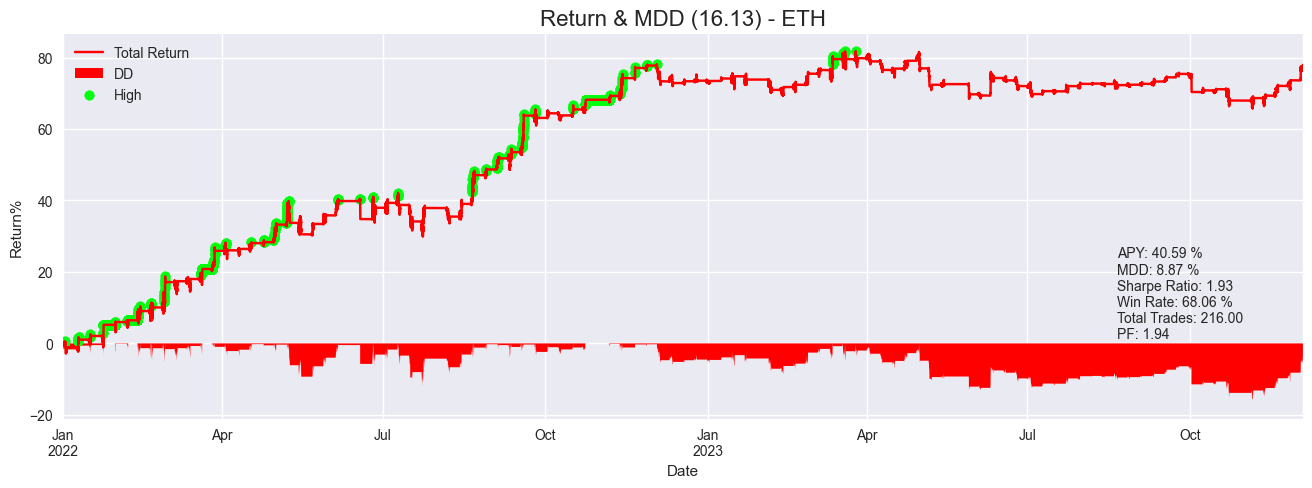

In [5]:
start = '2022-01-01'
sep = ''
end = ''

params = eval(data['params'].iloc[i])
print(params)
                
side = 'both'
config = {'freq':'5min', 'lag':1, 'fee': 0.0003, 'weekend_filter':False}
coin = 'BTC'

df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
value = analyze.show_pf_analysis(params, side, coin, axv_index='')

In [2]:
import pickle

with open('my_data.pkl', 'rb') as file:
    df_dict = pickle.load(file)

In [6]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

done = os.listdir('./15min/')

# for freq in ['5min','15min','30min']:
for symbol in list(df_dict.keys()):
    if symbol in []:
        continue
    sample_sets = [[start,end]]
    freq = '15min'

    params = {"long_ma":[4,150,4],
            "short_ma":[4,100,4],
            "hour":[2,3,1],
            "sl":[4,6,1]}

    config = {'freq':freq,'fee': 0.0003,'weekend_filter': False}

    try:
        multi_test = MultiTester(
            Strategy,
            get_data_func=get_data,
            params=params,
            config=config,
            symbol_list=[symbol],
            start=start,
            df_dict=df_dict,
            end=end,
            )

        all_params = multi_test.multi_params([symbol],sample_sets,direction='both')
        trades, value_df = multi_test.multi_params_result(all_params)
    except Exception as e:
        print(symbol)

======================= BTC BOTH Optimize Test =======================
Optimization trails: 1776


KeyboardInterrupt: 